In [172]:
import pandas as pd
import numpy as np
import re
import nltk

In [173]:
train  = pd.read_csv(r'C:\Users\Tejas\Desktop\Capstone\DatasetsCleaned\LeaveOneOut\leave_tcc.csv')
test = pd.read_csv(r'C:\Users\Tejas\Desktop\Capstone\DatasetsCleaned\UniformClasses\Clean\tcc.csv')

In [174]:
train.dropna(inplace=True)
# indices_to_keep_train = ~train.isin([np.nan, np.inf, -np.inf]).any(1)
# train = train[indices_to_keep_train].astype(np.float64)

In [175]:
test.dropna(inplace=True)
# indices_to_keep_test = ~test.isin([np.nan, np.inf, -np.inf]).any(1)
# test = test[indices_to_keep_test].astype(np.float64)

In [176]:
train = train[['Text','Class']]
train

,Text,Class
0,rt mayasolov woman shouldnt complain clean ho...,NOT
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,OFF
2,rt urkindofbrand dawg rt ever fuck bitch sta...,OFF
3,rt cganderson vivabas look like tranni,OFF
4,rt shenikarobert shit hear might true might f...,OFF
...,...,...
109656,unpopular opinion nazi probabl best cult ever,OFF
109657,nice ghetto rim faggot,OFF
109658,prophet muhammad saw say full neighbour slee...,NOT
109659,german blame bloodsh fabric matrix break find...,OFF


c:\Users\Tejas\Desktop\Capstone\hate-speech-project\hsp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

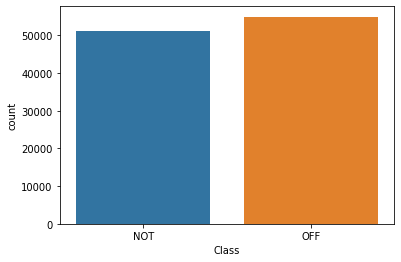

In [177]:
import seaborn as sns
sns.countplot('Class',data=train)

In [178]:
test = test[['Text','Class']]
test

,Text,Class
0,explanationwhi edit made usernam hardcor metal...,NOT
1,daww match background colour im seem stuck tha...,NOT
2,hey man im realli tri edit war guy constant re...,NOT
3,morei cant make real suggest improv wonder se...,NOT
4,sir hero chanc rememb page that,NOT
...,...,...
159566,second time ask view complet contradict covera...,NOT
159567,asham horribl thing put talk page,NOT
159568,spitzer umm there actual articl prostitut ring...,NOT
159569,look like actual put speedi first version dele...,NOT


c:\Users\Tejas\Desktop\Capstone\hate-speech-project\hsp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

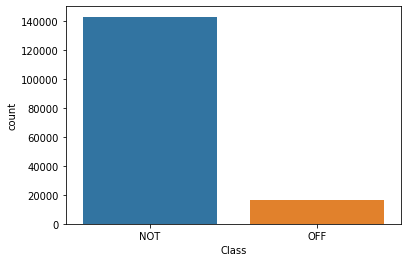

In [179]:
sns.countplot('Class',data=test)

In [180]:
# text = data['Text']
# label = data['Class']

In [181]:
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(text, label, random_state=42)
# print(len(x_train), len(y_train))
# print(len(x_test), len(y_test))

In [182]:
x_train = train['Text']
y_train = train['Class']
x_test = test['Text']
y_test = test['Class']

print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

106033 106033
159434 159434


In [183]:
# from sklearn.feature_extraction.text import CountVectorizer

# count = CountVectorizer(stop_words='english', ngram_range=(1,5))
# x_train_vectorizer=count.fit_transform((x_train).values.astype('str'))


In [184]:
# x_test_vectorizer=count.transform(x_test.values.astype('str'))
# x_train_vectorizer.toarray()

In [185]:
# count.vocabulary_

In [186]:
# from sklearn.feature_extraction.text import TfidfTransformer
# tfidf = TfidfTransformer()
# x_train_tfidf = tfidf.fit_transform(x_train_vectorizer)

# # x_train_tfidf.toarray()
# x_test_tfidf = tfidf.transform(x_test_vectorizer)

In [187]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [188]:
# SVM
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
    alpha=1e-3, random_state=42,
    max_iter=5, tol=None)),
])

In [189]:
text_clf.fit(x_train, y_train)
predicted = text_clf.predict(x_test)
np.mean(predicted == y_test)

0.9159526826147497

In [190]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted,
target_names=['NOT','OFF']))

metrics.confusion_matrix(y_test, predicted)



              precision    recall  f1-score   support

         NOT       0.91      1.00      0.96    143212
         OFF       0.98      0.18      0.30     16222

    accuracy                           0.92    159434
   macro avg       0.95      0.59      0.63    159434
weighted avg       0.92      0.92      0.89    159434



array([[143160,     52],
       [ 13348,   2874]], dtype=int64)